In [1]:
from selenium import webdriver

# Tasks

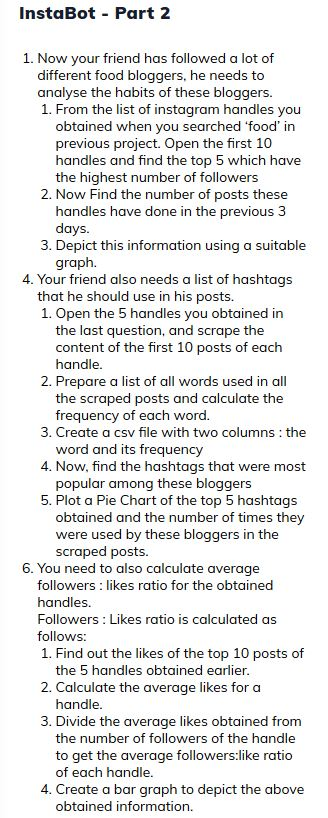

In [1]:
from IPython.display import Image
Image("Pictures\Capture3.JPG")

In [2]:
driver = webdriver.Chrome(executable_path = 'C:\driver\chromedriver')

In [3]:
driver.get('https://www.instagram.com/accounts/login/?source=auth_switcher')

# 1.1 

In [5]:
user_name = driver.find_elements_by_xpath("//*[@class = '_2hvTZ pexuQ zyHYP']")

user_name[0].send_keys('Sample UserName')
user_name[1].send_keys('Sample Password')

user_name[0].submit()

In [14]:
button = driver.find_element_by_xpath("//*[@class = 'LWmhU _0aCwM']/input")
button.send_keys('food')

In [15]:
Insta_handles = driver.find_elements_by_class_name('RR-M-')

In [17]:
from bs4 import BeautifulSoup

data = BeautifulSoup(driver.page_source, 'lxml')

Instagram_handles = data.find_all(class_ = 'Ap253')

In [18]:
handles = []
for i in Instagram_handles:
    if i.string[0] != '#' and i.string[0] != 'F' and i.string[0] != 'G' and i.string != 'food':
        handles.append(i.string)

In [19]:
print(handles[:10])

['foodyfetish', 'dilsefoodie', 'food_lunatic', 'foodmaniacindia', 'foodness_hotness', 'food_ask_me', 'food.slayers_', 'foodie_lama', 'foodtalkindia', 'delhifoodshow']


In [20]:
basic = 'https://www.instagram.com/'
links = []

for i in handles[:10]:
    links.append(basic + str(i))

In [21]:
follower = []
for i in links:
    driver.get(i)
    data = BeautifulSoup(driver.page_source, 'lxml')
    followers = data.find_all(class_ = 'g47SY')[1]
    follower.append(followers['title'])

In [22]:
followers = []
for i in follower:
    i = i.replace(',', '')
    followers.append(i)

In [23]:
print(followers)

['3498018', '294958', '60012', '270216', '175', '5119', '6133', '901', '282660', '1241']


In [24]:
d = {}

for i in range(10):
    x = handles[i]
    d[x] = d.get(i, 0) + int(followers[i])

In [25]:
sorted_d = sorted(d, key = d.get, reverse=True)

In [26]:
for i in sorted_d[:5]:
    print(i, d[i])

foodyfetish 3498018
dilsefoodie 294958
foodtalkindia 282660
foodmaniacindia 270216
food_lunatic 60012


# 1.2

In [27]:
link = []
for i in sorted_d[:5]:
    link.append(basic + str(i))

In [28]:
number_of_posts = []
from bs4 import BeautifulSoup
import time


for i in link:
    count = 0
    driver.get(i)
    
    for i in range(100):
        driver.execute_script('window.scrollBy(0,10000)')
    time.sleep(4)
    
    
    x = driver.find_elements_by_class_name('Nnq7C')
    
    for i in x:
        y = driver.find_elements_by_class_name('v1Nh3')
        for j in y:
            j.click()
            
            time.sleep(4)
            
            data = BeautifulSoup(driver.page_source, 'lxml')
            
            date = data.find(class_ = '_1o9PC')
            
            t = date.text
            
            count += 1
            driver.back()
            
            if t == '3 days ago':
                break
                
        if t == '3 days ago':
            number_of_posts.append(count)
            break
            
print(number_of_posts)           

[21, 6, 7, 7, 8]


In [29]:
di = {}

for i in range(5):
    x = sorted_d[i]
    di[x] = di.get(i, 0) + int(number_of_posts[i])

In [30]:
print(di)

{'foodyfetish': 21, 'dilsefoodie': 6, 'foodtalkindia': 7, 'foodmaniacindia': 7, 'food_lunatic': 8}


# 1.3

In [31]:
foll = []
handle = []

for i in sorted_d[:5]:
    foll.append(d[i])
    handle.append(i)

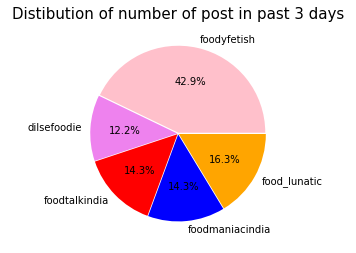

In [33]:
import matplotlib.pyplot as plt

colors = ['Pink', 'Violet', 'Red', 'Blue', 'Orange']
explode = [0.01, 0.01, 0.01, 0.01, 0.01]

plt.title('Distibution of number of post in past 3 days', fontsize = 15)
plt.axis('equal')
plt.pie(number_of_posts, colors = colors, explode = explode, labels = handle, autopct = '%.1f%%')
plt.show()

As the foodyfetish have the maximum number of followers hence, the post in the past three days, i.e. today, yesterday and day before yesterday , are maximum. Also to be noticed, the handle at 5th position, food_lunatic, has almost same number of posts like else, this shows this handle is on the path of foodyfetish. Therefore, clearly seen, the more you post the more followers get attracts towards you.

# 2.1

In [34]:
content = []

from bs4 import BeautifulSoup
import time


for i in link:
    count = 0
    driver.get(i)
    
    for b in range(100):
        driver.execute_script('window.scrollBy(0,10000)')
    time.sleep(4)
    
    
    x = driver.find_elements_by_class_name('Nnq7C')
    
    for a in x:
        y = driver.find_elements_by_class_name('v1Nh3')
        for j in y:
            j.click()
            
            time.sleep(5)
            
            data = BeautifulSoup(driver.page_source, 'lxml')
            
            if i == 'https://www.instagram.com/dilsefoodie' or i == 'https://www.instagram.com/foodtalkindia' :
                c = data.find(class_ = 'C4VMK')
                x = c.text
            else:
                c = data.find(class_ = 'C4VMK')
                x = c.span.text
                
            print(x)
            content.append(x)
            
            count += 1
            driver.back()
            
            
            if count == 10:
                break
                
        if count == 10:
            break

Which platter are you choosing? 😱Top: Fries + Fried Chicken🍟🍗Middle: Fried Chicken + Mac & Cheese🍗🧀Bottom: Wings, Mozzarella Sticks, and Onion Rings🍗🧀Love food?  Follow us: @foodyfetish❣️pc: @goodeatzcoTag a Hungry Friend!👇🏼
Cereal Infused Ice Cream w/ Froot Loops and Frozen Berries then topped with Mini Gummy Bears and Fruity Pebbles Dust!😍🍦💦Love food?  Follow us: @foodyfetish❣️vc: @sweetportfolioTag a Dessert Lover!👇🏼
Steak Taquitos topped with a Guac, Cheese, and Sauce!😍🌮🧀🥑Love food?  Follow us: @foodyfetish❣️vc: @hungryhugh🎶: @iksonofficial Song: StardustTag a Hungry Friend!👇🏼
Meatball stuffed Garlic Bread Recipe!🥖🍖🧀Love food?  Follow us: @foodyfetish❣️vc: @buzzfeedtasty Tag a Hungry Friend!👇🏼
ICE CREAM ROLLS on top of a BUBBLE WAFFLE and covered in whipped cream, chocolate sauce, caramel and chocolate chips!👌🏼😍🙌🏼Love food?  Follow us: @foodyfetish❣️vc: @hungryhugh 🎶: Artist: @iksonofficial; Music: FreshTag a Hungry Friend!👇🏼
Chips & Guac Heaven!😍🥑🔥🎥: @foodyfetish #foodyfetishorigi

# 2.2

In [35]:
dictionary = {}
for i in content:
    x = i.split(' ')
    
    for j in x:
        dictionary[j] = dictionary.get(j, 0) + 1

In [36]:
sorted_dict = sorted(dictionary, key = dictionary.get, reverse=True)

In [37]:
words = []
frequency = []
for i in sorted_dict:
    if i != '':
        words.append(i)
        frequency.append(dictionary[i])
        print(i, dictionary[i])

the 61
and 56
a 53
to 35
of 34
with 26
in 25
your 24
at 24
for 24
on 21
you 14
are 13
& 13
this 13
by 12
our 11
is 11
be 10
I 9
Follow 8
And 8
from 8
food? 7
us: 7
was 7
- 7
will 7
food 7
can 7
Turmeric 7
The 7
#huffposttaste 7
#buzzfeast 7
#indianfood 7
#indiagram 7
Tag 6
chocolate 6
2 6
#delhi 6
#delhigram 6
#delhidiaries 6
#delhiblogger 6
#delhi_igers 6
#dilli 6
#delhincr 6
#delhite 6
#foodporn 6
#instafood 6
platter 5
Chicken 5
Hungry 5
Friend!👇🏼 5
@foodyfetish❣️vc: 5
We 5
Food 5
In 5
these 5
their 5
so 5
#delhifood 5
#delhifoodie 5
#forkyeah 5
Pav 5
Fried 4
topped 4
that 4
really 4
Butter 4
best 4
all 4
meal 4
To 4
Bhaji 4
love 4
experience 4
Mumbai 4
#mumbai 4
as 4
have 4
out 4
winner 4
cocktails 4
more 4
#buzzfeedfood 4
#indiatravel 4
one 4
Delhi👈📸 4
Veg 4
Lover!👇🏼 3
@foodyfetish 3
Friend 3
You 3
must 3
try 3
#foodfood 3
On 3
explore 3
us 3
#igxindian 3
over 3
For 3
we 3
only 3
? 3
#mumbaifood 3
has 3
little 3
up 3
taste 3
veg 3
thought 3
they 3
make 3
Vahdam 3
simple 3
@blackan

# 2.3

In [38]:
import csv

with open('frequencies.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerows(zip(words, frequency))

# 2.4

In [39]:
hashtags = []
count = []
for i in sorted_dict:
    if i != '':
        if i[0] == "#":
            hashtags.append(i)
            count.append(dictionary[i])

In [40]:
print(hashtags)

['#huffposttaste', '#buzzfeast', '#indianfood', '#indiagram', '#delhi', '#delhigram', '#delhidiaries', '#delhiblogger', '#delhi_igers', '#dilli', '#delhincr', '#delhite', '#foodporn', '#instafood', '#delhifood', '#delhifoodie', '#forkyeah', '#mumbai', '#buzzfeedfood', '#indiatravel', '#foodfood', '#igxindian', '#mumbaifood', '#mumbaiblogger', '#mumbai_igers', '#mumbaidiaries', '#bombay', '#foodyfetishoriginal', '#dilsefoodie', '#delhifoodblogger', '#storiesofindia', '#foodmaniacvids', '#foodmaniacindia', '#indiapictures', '#mumbaibloggers', '#mumbaifoodblogger', '#mumbaifoodbloggers', '#mumbai_ig', '#foodiesofinstagram', '#instamumbai', '#buzzfeedtasty', '#foodgasm', '#foodphotography', '#foodyfetishoriginalTag', '#mithai', '#sandeshsweets', '#ladoo5h', '#lotancholekulche7h', '#mumbaifood1d', '#foodfood1d', '#Instagram', '#mumbai1d', '#Wemissyou', '#legend3d', '#amulbutter', '#amchimumbai3d', '#mutton', '#foodfood5d', '#FoodTalkIndiaXVahdamTeas', '#VahdamTeasOverload', '#TalkGin', '#Ed

# 2.5

In [41]:
x = []
y = []
for i in range(5):
    x.append(hashtags[i])
    y.append(count[i])
    print(hashtags[i], count[i])

#huffposttaste 7
#buzzfeast 7
#indianfood 7
#indiagram 7
#delhi 6


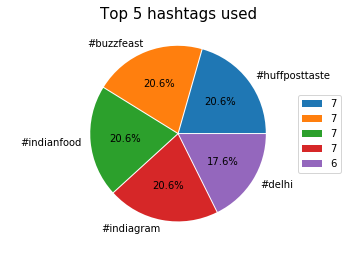

In [42]:
import matplotlib.pyplot as plt

explode = [0.01, 0.01, 0.01, 0.01, 0.01]
plt.title('Top 5 hashtags used', fontsize = 15)
plt.axis('equal')
plt.pie(y, explode = explode, labels = x, autopct = '%.1f%%')
plt.legend(y, loc="right")
plt.show()

# 3.1

In [43]:
likes = []
from bs4 import BeautifulSoup
import time
from selenium.common.exceptions import NoSuchElementException


for i in link:
    count = 0
    driver.get(i)
    
    for a in range(100):
        driver.execute_script('window.scrollBy(0,10000)')
    time.sleep(4)
    
    x = driver.find_elements_by_class_name('Nnq7C')
    
    for b in x:
        y = driver.find_elements_by_class_name('v1Nh3')
        for j in y:
            j.click()
            
            time.sleep(4)
            
            while True:
                
                try:
                    z = driver.find_element_by_class_name('vcOH2')
                    z.click()

                    data = BeautifulSoup(driver.page_source, 'lxml')

                    c = data.find(class_ = 'vJRqr')

                    x = c.text
                    likes.append(x)
                    count += 1
                    if count == 10:
                        break
                    driver.back()
                    break

                except NoSuchElementException:

                    data = BeautifulSoup(driver.page_source, 'lxml')

                    c = data.find(class_ = 'Nm9Fw')

                    x = c.span.text
                    likes.append(x)
                    count += 1
                    if count == 10:
                        break
                    driver.back()
                    break
                
            if count == 10:
                break
        if count == 10:
            break

In [44]:
print(likes)
print(len(likes))

['21,601', '6,824 likes', '8,155 likes', '10,493 likes', '15,416 likes', '9,219 likes', '7,377 likes', '14,794 likes', '12,558 likes', '8,449 likes', '249', '2,642', '4,652', '2,777', '6,279', '5,076', '14,522', '4,903', '7,501 likes', '4,356 likes', '2', '381', '222 likes', '544', '273', '246 likes', '763', '1,264', '396', '742', '487', '2,063 likes', '3,310', '1,559 likes', '6,755', '3,294', '2,598', '5,261', '1,576 likes', '4,704', '915 likes', '739', '1,159', '4,145 likes', '2,311', '1,172', '3,136 likes', '1,941 likes', '4,028', '1,956 likes']
50


In [45]:
like = []
for i in likes:
    i = i.replace(',', '')
    like.append(i.split(' ')[0])

In [46]:
print(like)

['21601', '6824', '8155', '10493', '15416', '9219', '7377', '14794', '12558', '8449', '249', '2642', '4652', '2777', '6279', '5076', '14522', '4903', '7501', '4356', '2', '381', '222', '544', '273', '246', '763', '1264', '396', '742', '487', '2063', '3310', '1559', '6755', '3294', '2598', '5261', '1576', '4704', '915', '739', '1159', '4145', '2311', '1172', '3136', '1941', '4028', '1956']


# 3.2

In [47]:
like_1 = []

for i in range(10):
    like_1.append(int(like[i]))

In [48]:
like_2 = []

for i in range(10, 20):
    like_2.append(int(like[i]))

In [49]:
like_3 = []

for i in range(20, 30):
    like_3.append(int(like[i]))

In [50]:
like_4 = []

for i in range(30, 40):
    like_4.append(int(like[i]))

In [51]:
like_5 = []

for i in range(40, 50):
    like_5.append(int(like[i]))

In [52]:
avg_likes = []

In [53]:
avg = 0
for i in like_1:
    avg += i
avg_likes.append(avg/10)

In [54]:
avg = 0
for i in like_2:
    avg += i
avg_likes.append(avg/10)

In [55]:
avg = 0
for i in like_3:
    avg += i
avg_likes.append(avg/10)

In [56]:
avg = 0
for i in like_4:
    avg += i
avg_likes.append(avg/10)

In [57]:
avg = 0
for i in like_5:
    avg += i
avg_likes.append(avg/10)

In [58]:
avg_likes

[11488.6, 5295.7, 483.3, 3160.7, 2150.2]

# 3.3

In [59]:
for i in sorted_d[:5]:
    print(i, d[i])

foodyfetish 3498018
dilsefoodie 294958
foodtalkindia 282660
foodmaniacindia 270216
food_lunatic 60012


In [60]:
print(avg_likes)

[11488.6, 5295.7, 483.3, 3160.7, 2150.2]


In [61]:
total_followers = []
follower = []
for i in sorted_d[:5]:
    follower.append(i)
    total_followers.append(d[i])

In [62]:
print(total_followers)

[3498018, 294958, 282660, 270216, 60012]


In [66]:
ratio = []
for i in range(5):
    ratio.append(avg_likes[i]/total_followers[i])

In [67]:
print(ratio)

[0.0032843170046580666, 0.017954081598058027, 0.001709828061982594, 0.011696938745300055, 0.03582950076651336]


# 3.4

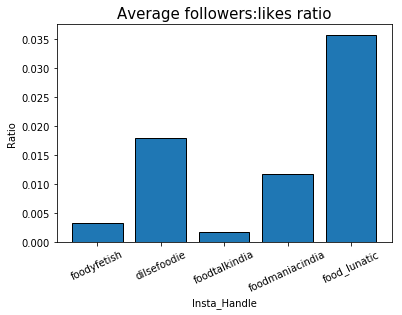

In [68]:
import matplotlib.pyplot as plt
import numpy as np

plt.bar(follower, ratio, edgecolor = 'Black')
indexbar = np.arange(0,5,1)
plt.ylabel('Ratio')
plt.xlabel('Insta_Handle')
plt.title('Average followers:likes ratio', fontsize = 15)
plt.xticks(indexbar, follower, rotation = 25)
plt.show()